In [26]:
import numpy as np
import random
import matplotlib.pyplot as plot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten 

# Dataset

In [27]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [28]:
print("Shape X_train",X_train.shape)
print("Shape Y_train",Y_train.shape)
print("Shape X_test ",X_test.shape)
print("Shape Y_test",Y_test.shape)

Shape X_train (2000, 30000)
Shape Y_train (2000,)
Shape X_test  (400, 30000)
Shape Y_test (400,)


In [29]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [30]:
print("Shape X_train",X_train.shape)
print("Shape Y_train",Y_train.shape)
print("Shape X_test ",X_test.shape)
print("Shape Y_test",Y_test.shape)

Shape X_train (2000, 100, 100, 3)
Shape Y_train (2000, 1)
Shape X_test  (400, 100, 100, 3)
Shape Y_test (400, 1)


In [33]:
X_train[0,:]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

In [34]:
X_train = X_train/255.0
X_test  = X_test/255.0

In [35]:
X_train[0,:]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

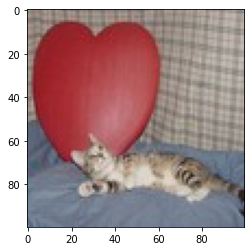

In [36]:
index = random.randint(0,len(X_train))
plot.imshow(X_train[index,:])
plot.show()

# Model Building

In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

In [37]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [40]:
# opti = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 7s 228ms/step - loss: 0.1478 - accuracy: 0.9510
Epoch 2/5
32/32 [==============================] - 7s 219ms/step - loss: 0.1237 - accuracy: 0.9545
Epoch 3/5
32/32 [==============================] - 7s 219ms/step - loss: 0.0877 - accuracy: 0.9785
Epoch 4/5
32/32 [==============================] - 7s 217ms/step - loss: 0.0615 - accuracy: 0.9865
Epoch 5/5
32/32 [==============================] - 7s 226ms/step - loss: 0.0518 - accuracy: 0.9930


In [44]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 1.1283 - accuracy: 0.6875


[1.1282786130905151, 0.6875]

# Predictions

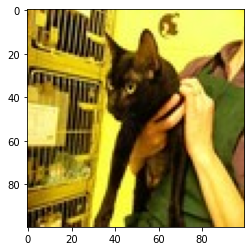

1/1 [==============================] - 0s 20ms/step
It is:  Dog


In [51]:
index = random.randint(0,len(Y_test))
plot.imshow(X_test[index,:])
plot.show()

pred = model.predict(X_test[index,:].reshape(1,100,100,3))
pred = pred > .05

if(pred == 0):
    result = "Dog"
else:
    result = "Cat"
    
print("It is: ",result)